In [3]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [4]:
mnist = fetch_mldata("MNIST original")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X, y = mnist['data'], mnist["target"]

In [6]:
import matplotlib.pyplot as plt
import matplotlib

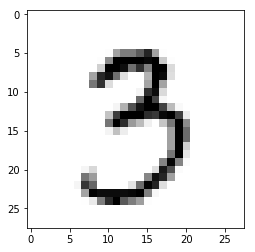

In [7]:
plt.imshow(X[20000,:].reshape(28,28), cmap=matplotlib.cm.binary)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, y_train, X_test, y_test = np.array(X[:60000], dtype = float), np.array(y[:60000], dtype = float), np.array(X[60000:], dtype = float), np.array(y[60000:], dtype = float)

In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

Wall time: 13min 40s


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9688

In [26]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA  = pca.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_PCA, y_train)
knn.score(X_test_PCA, y_test)

0.9728

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_PCA, y_train)
knn.score(X_test_PCA, y_test)

0.936

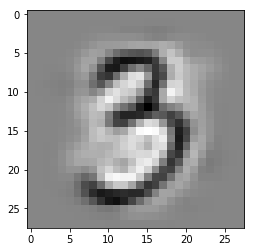

In [19]:
X_train_re = X_train_PCA.dot(pca.components_)
plt.imshow(X_train_re[20000,:].reshape(28,28), cmap=matplotlib.cm.binary)
plt.show()

In [23]:
pca.components_

array([[ 5.02641633e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.00346555e-19,  2.77555756e-17, -5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.66070850e-19,  5.55111512e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.10047663e-18,  1.19695920e-16, -9.36750677e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.79183588e-18, -6.59194921e-17,  4.85722573e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.07764733e-19,  5.20417043e-18,  5.20417043e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [28]:
from sklearn import datasets

In [29]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [30]:
nosiy_digits = X + np.random.normal(0,4, size = X.shape)

In [31]:
X.shape

(1797, 64)

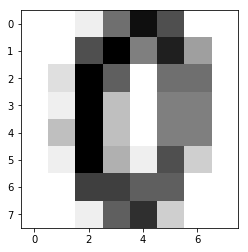

In [33]:
plt.imshow(X[10,:].reshape(8,-1), cmap=matplotlib.cm.binary)
plt.show()

In [34]:
example_digits = nosiy_digits[y == 0, :][:10]
for num in range(1,10):
    X_num = nosiy_digits[y == num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [35]:
example_digits.shape

(100, 64)

In [44]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize = (10,10), subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace = 0.1,wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,-1),cmap = "binary", interpolation = "nearest", clim=(0,16))
    plt.show()

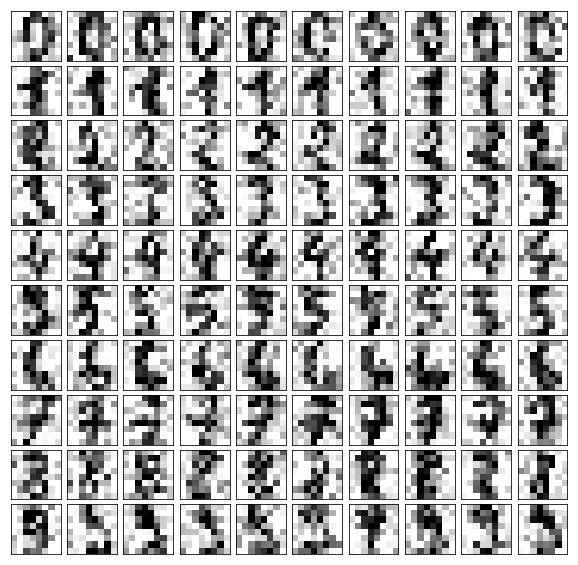

In [45]:
plot_digits(example_digits)

In [61]:
pca = PCA(0.8)
pca.fit(nosiy_digits)
digits_clean = pca.inverse_transform(pca.transform(nosiy_digits))

In [62]:
example_digits_clean = digits_clean[y == 0, :][:10]
for num in range(1,10):
    X_num = digits_clean[y == num, :][:10]
    example_digits_clean = np.vstack([example_digits_clean, X_num])

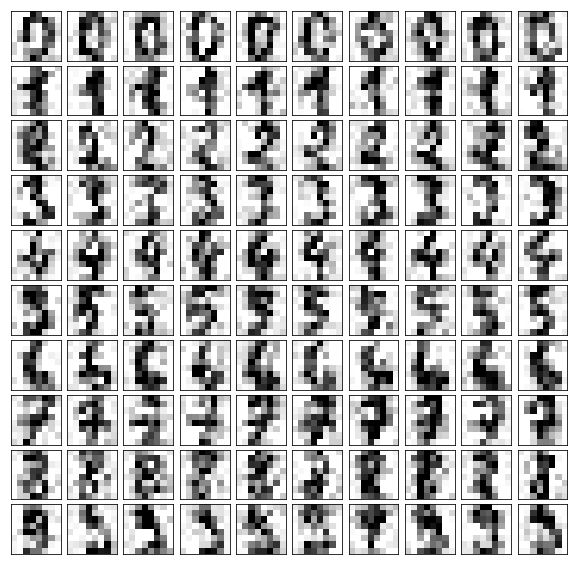

In [63]:
plot_digits(example_digits_clean)